In [280]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [281]:
data = pd.read_csv('GOLD.csv')

In [282]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [283]:
data.shape

(512, 9)

In [284]:
data.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [285]:
data.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        411 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [287]:
for i,j in zip(data["Change %"],data.index):
    data["Change %"][j] = float(i.replace('%',''))
    

/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        411 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [289]:
data['Change %'] = data['Change %'].astype("float")

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null float64
Pred        411 non-null float64
new         512 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 36.1+ KB


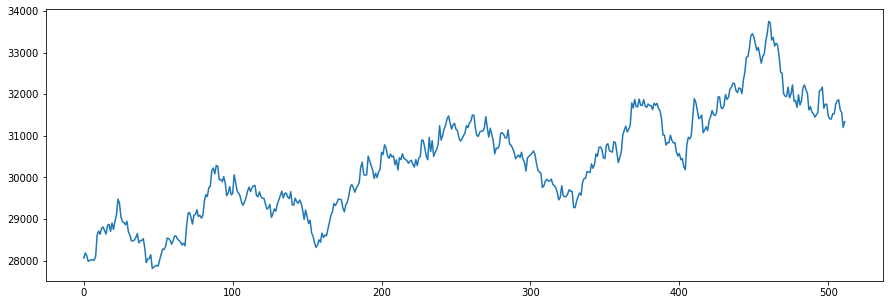

In [291]:
plt.figure(figsize=(15,5))
plt.plot(data['Price'])
plt.show()

In [292]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14,NaN,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44,NaN,429.924911


In [293]:
Y_train = data['Pred'].dropna()

In [294]:
Y_train.shape

(411,)

In [295]:
X_train = data[['Open','High','Low','Price']][:411]

In [296]:
X_train.shape

(411, 4)

In [297]:
lr = LinearRegression(normalize=True,)
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [298]:
Y_train_pred = lr.predict(X_train)

In [299]:
acc_train = lr.score(X_train,Y_train)

In [300]:
acc_train

1.0

In [301]:
from sklearn.preprocessing import StandardScaler

In [302]:
import seaborn as sns

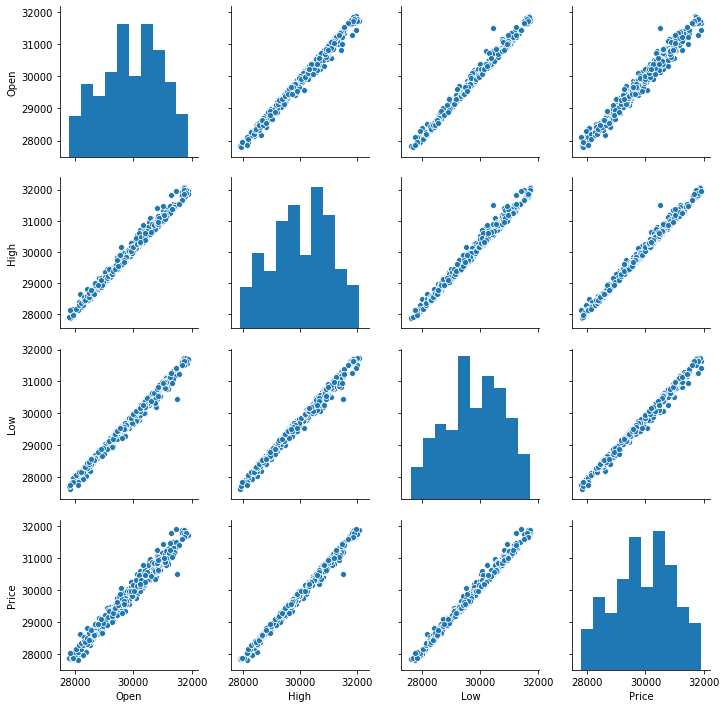

In [303]:
sns.pairplot(X_train,diag_kind='hist')

In [304]:
pd.DataFrame(X_train)

,Open,High,Low,Price
0,28400,28482,28025,28060
1,28136,28382,28135,28184
2,28145,28255,28097,28119
3,28125,28192,27947,27981
4,28060,28146,27981,28007
...,...,...,...,...
406,30874,31085,30874,30964
407,30830,30970,30825,30926
408,31039,31196,30974,31005
409,31011,31480,30941,31440


In [305]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09,124.0,112.153318


In [306]:
X_train.corr()

,Open,High,Low,Price
Open,1.000000,0.993764,0.994031,0.987029
High,0.993764,1.000000,0.993850,0.995279
Low,0.994031,0.993850,1.000000,0.995058
Price,0.987029,0.995279,0.995058,1.000000


In [307]:
data.corr()

,Price,Open,High,Low,Change %,Pred,new
Price,1.000000,0.989758,0.995125,0.996830,0.057801,0.040489,0.164504
Open,0.989758,1.000000,0.995988,0.993992,-0.063980,0.109153,0.058551
High,0.995125,0.995988,1.000000,0.994194,0.004574,0.080394,0.142109
Low,0.996830,0.993992,0.994194,1.000000,0.002571,0.014411,0.091895
Change %,0.057801,-0.063980,0.004574,0.002571,1.000000,-0.312600,0.781617
Pred,0.040489,0.109153,0.080394,0.014411,-0.312600,1.000000,-0.006109
new,0.164504,0.058551,0.142109,0.091895,0.781617,-0.006109,1.000000


(array([ 61., 161., 119.,  44.,  19.,   4.,   1.,   1.,   0.,   1.]),
 array([-146. ,   89.6,  325.2,  560.8,  796.4, 1032. , 1267.6, 1503.2,
        1738.8, 1974.4, 2210. ]),
 <a list of 10 Patch objects>)

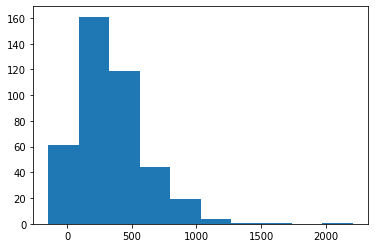

In [308]:
plt.hist(Y_train)

(array([ 61., 161., 119.,  44.,  19.,   4.,   1.,   1.,   0.,   1.]),
 array([-146. ,   89.6,  325.2,  560.8,  796.4, 1032. , 1267.6, 1503.2,
        1738.8, 1974.4, 2210. ]),
 <a list of 10 Patch objects>)

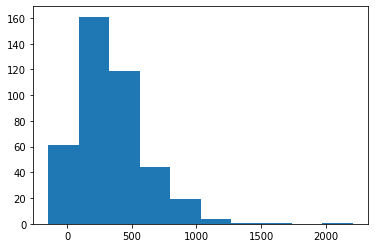

In [309]:
plt.hist(Y_train_pred)

(array([218., 136.,  83.,  39.,  15.,  10.,   4.,   6.,   0.,   1.]),
 array([  11.10981387,  150.73098101,  290.35214815,  429.97331529,
         569.59448242,  709.21564956,  848.8368167 ,  988.45798383,
        1128.07915097, 1267.70031811, 1407.32148524]),
 <a list of 10 Patch objects>)

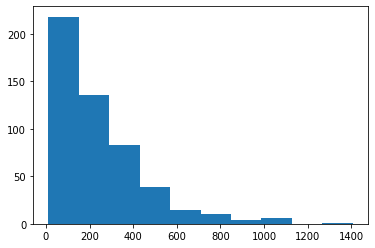

In [310]:
plt.hist(data['new'])

In [311]:
pd.DataFrame(Y_train_pred)

,0
0,738.0
1,-146.0
2,30.0
3,357.0
4,124.0
...,...
406,-31.0
407,72.0
408,35.0
409,669.0


In [312]:
pd.DataFrame(Y_train)

,Pred
0,738.0
1,-146.0
2,30.0
3,357.0
4,124.0
...,...
406,-31.0
407,72.0
408,35.0
409,669.0


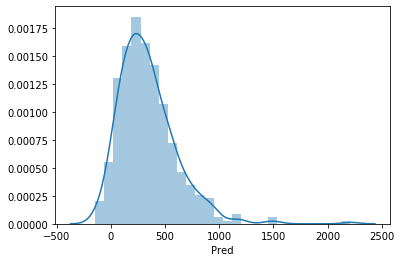

In [313]:
sns.distplot(Y_train)

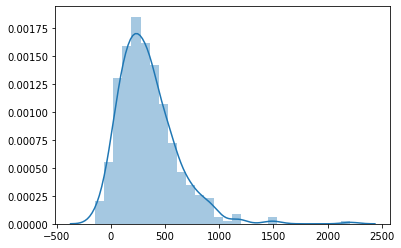

In [314]:
sns.distplot(Y_train_pred)

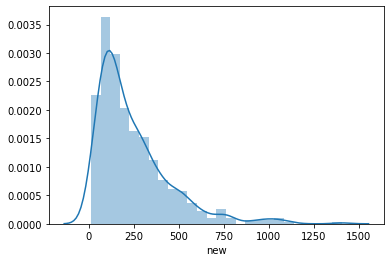

In [315]:
sns.distplot(data['new'])

In [316]:
from sklearn.metrics import mean_squared_error

In [317]:
rmse = mean_squared_error(Y_train,Y_train_pred)

In [318]:
np.sqrt(rmse)

9.226447449155296e-12

In [319]:
from sklearn.preprocessing import PolynomialFeatures

In [320]:
pol = PolynomialFeatures(degree = 2)

In [321]:
X_train_new = data[['Open','High','Low','Change %']]

In [322]:
Y_train_new = data['new']

In [323]:
Y_train_new = np.array(Y_train_new).reshape(-1,1)

In [324]:
X_train_poly = pol.fit_transform(X_train_new)

In [325]:
lr.fit(X_train_poly,Y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [326]:
r2_poly_new = lr.score(X_train_poly,Y_train_new)

In [327]:
r2_poly_new

0.9396813203645529

In [328]:
Y_train_pred_poly_new = lr.predict(X_train_poly)

In [329]:
rmse_poly_new = np.sqrt(mean_squared_error(Y_train_new,Y_train_pred_poly_new))

In [330]:
rmse_poly_new

50.49208709221437

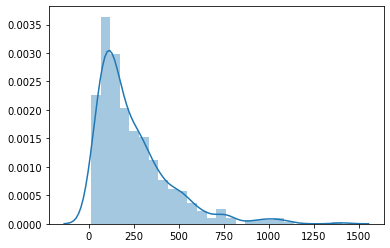

In [331]:
sns.distplot(Y_train_new)

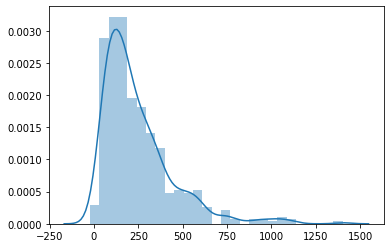

In [332]:
sns.distplot(Y_train_pred_poly_new)

# Linear Model for Predicting New Column


In [333]:
X = data[['Open','High','Low','Price']]
Y = data['new']

In [334]:
lr = LinearRegression()

In [335]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [336]:
Y_pred = lr.predict(X)

In [337]:
r2 = lr.score(X,Y)

In [338]:
r2

0.9999886649319772

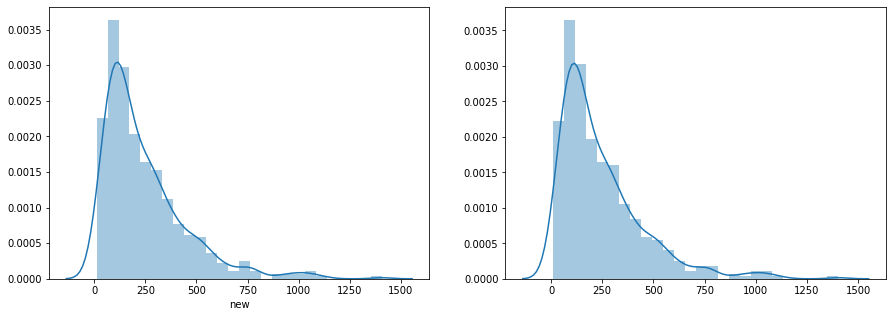

In [339]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(Y)
plt.subplot(1,2,2)
sns.distplot(Y_pred)

# Polynomialy Model for New Column

In [340]:
X = data[['Open','High','Low','Price']]
Y = np.asarray(data['new']).reshape(-1,1)

In [341]:
poly = PolynomialFeatures(degree=2)

In [342]:
X_poly = poly.fit_transform(X)

In [343]:
Y = Y.reshape(-1,1)

In [344]:
lr.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [345]:
Y_pred = lr.predict(X_poly)

In [346]:
r2 = lr.score(X_poly,Y)

In [347]:
r2

0.9999999919827844

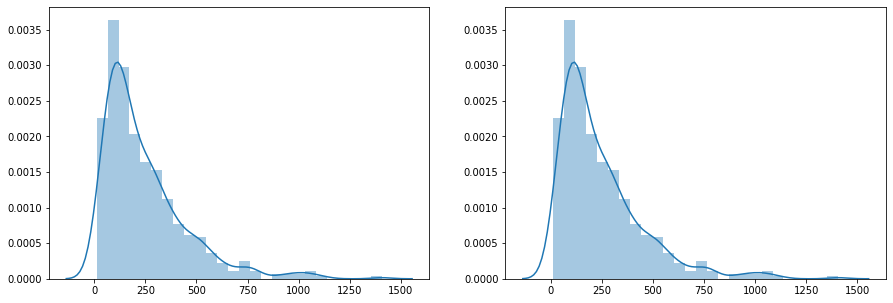

In [348]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(Y)
plt.subplot(1,2,2)
sns.distplot(Y_pred)

# Linear Model for Predicting the Pred column

In [349]:
Y = np.asarray(data['Pred'].dropna())

In [350]:
print(Y.shape)

(411,)


In [351]:
X = data[['Open','High','Low','Price']][:411]

In [352]:
print(X.shape)

(411, 4)


In [353]:
lr = LinearRegression()

In [354]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [355]:
Y_pred = lr.predict(X)

In [356]:
r2 = lr.score(X,Y)

In [357]:
r2

1.0

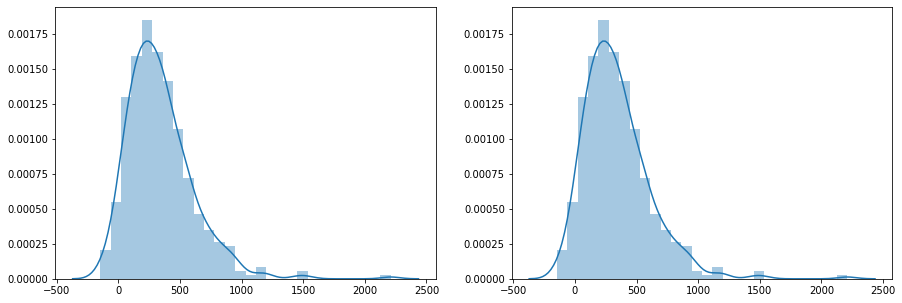

In [358]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(Y)
plt.subplot(1,2,2)
sns.distplot(Y_pred)

In [359]:
input_coeff = lr.intercept_

In [360]:
input_coeff

-5.360334398574196e-11

In [361]:
input_coeffs = lr.coef_

In [362]:
input_coeffs

array([ 3., -1., -4.,  2.])

In [363]:
X_test = data[['Open','High','Low','Price']][411:]

In [364]:
predictions = lr.predict(X_test)

In [365]:

pd.DataFrame(predictions,columns=['Pred'])

,Pred
0,852.0
1,422.0
2,530.0
3,144.0
4,415.0
...,...
96,535.0
97,438.0
98,269.0
99,601.0


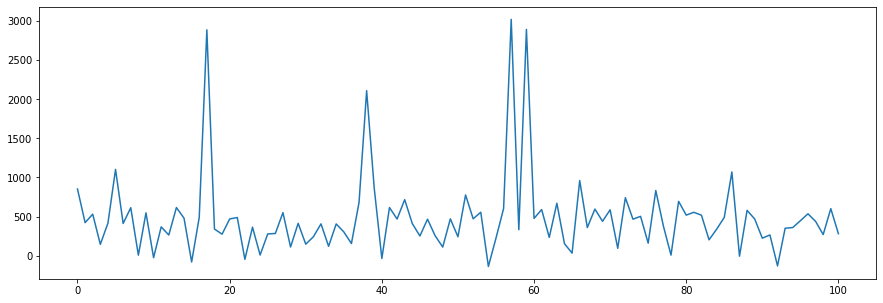

In [366]:
plt.figure(figsize=(15,5))
plt.plot(predictions)
plt.show()

In [367]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14,NaN,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44,NaN,429.924911


In [368]:
data_copy = data.copy()

In [369]:
data_copy['Pred'][411:] = predictions

/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [370]:
data_copy.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08,535.0,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76,438.0,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20,269.0,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14,601.0,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44,280.0,429.924911


In [371]:
data_copy['Date'] = data_copy['Date'].astype('datetime64')

In [372]:
data_copy.describe()

,Price,Open,High,Low,Change %,Pred,new
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,0.019883,370.033203,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,0.573099,341.296591,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-1.790000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,-0.330000,164.000000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,0.005000,322.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,0.330000,495.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,1.990000,3024.000000,1407.321485


In [373]:
data_copy.set_index('Date',inplace=True)

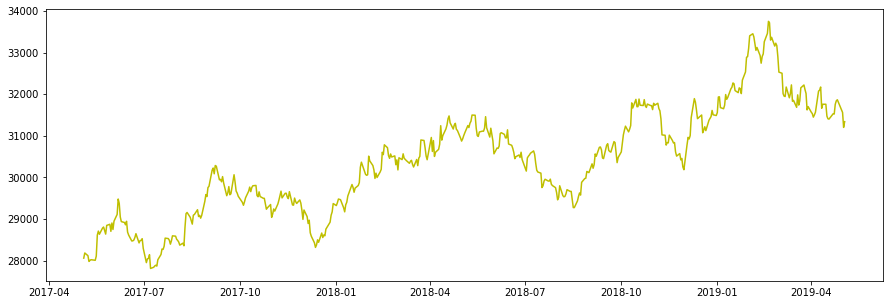

In [374]:
plt.figure(figsize=(15,5))
plt.plot(data_copy['Price'],color='y')
plt.show()

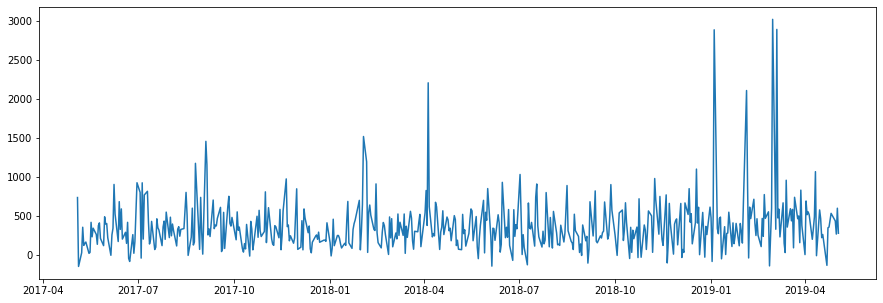

In [375]:
plt.figure(figsize=(15,5))
plt.plot(data_copy['Pred'])
plt.show()

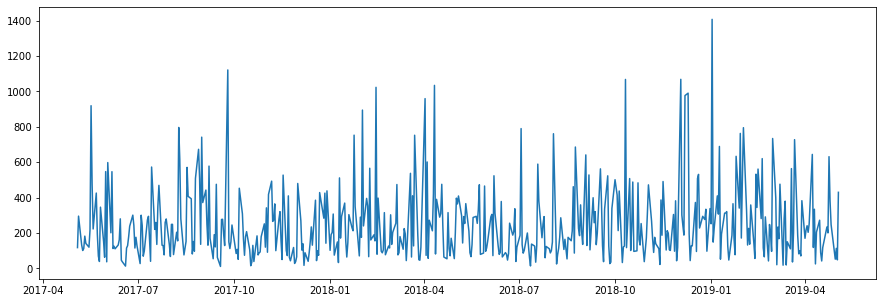

In [376]:
plt.figure(figsize=(15,5))
plt.plot(data_copy['new'])
plt.show()

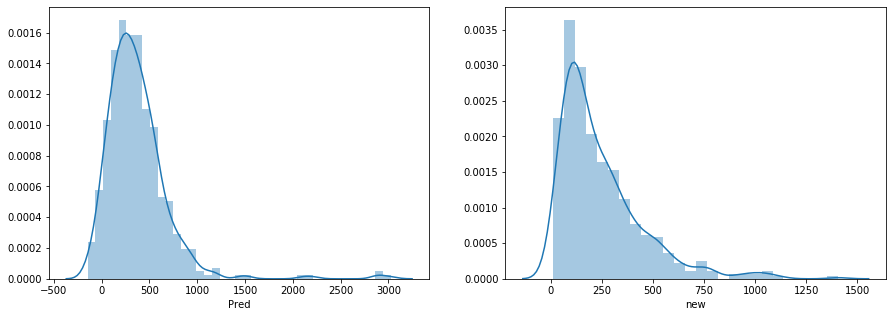

In [377]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.distplot(data_copy['Pred'])
plt.subplot(1,2,2)
sns.distplot(data_copy['new'])

In [378]:
data_copy.corr()

,Price,Open,High,Low,Change %,Pred,new
Price,1.000000,0.989758,0.995125,0.996830,0.057801,0.138300,0.164504
Open,0.989758,1.000000,0.995988,0.993992,-0.063980,0.216978,0.058551
High,0.995125,0.995988,1.000000,0.994194,0.004574,0.193260,0.142109
Low,0.996830,0.993992,0.994194,1.000000,0.002571,0.119018,0.091895
Change %,0.057801,-0.063980,0.004574,0.002571,1.000000,-0.350135,0.781617
Pred,0.138300,0.216978,0.193260,0.119018,-0.350135,1.000000,-0.008527
new,0.164504,0.058551,0.142109,0.091895,0.781617,-0.008527,1.000000


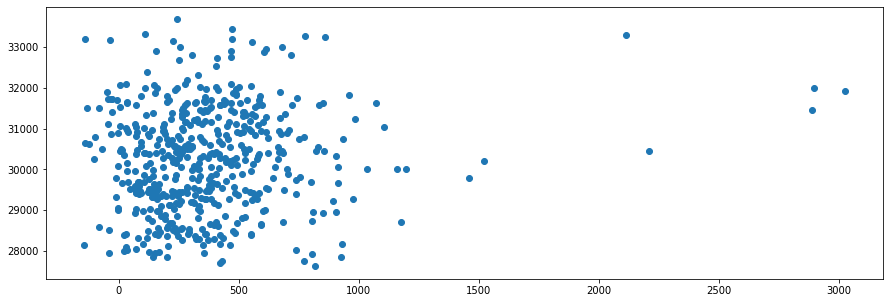

In [379]:
plt.figure(figsize=(15,5))
plt.scatter(data_copy['Pred'],data_copy['Low'])

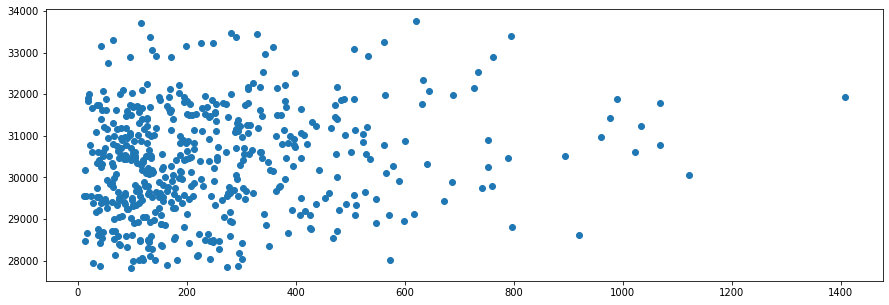

In [380]:
plt.figure(figsize=(15,5))
plt.scatter(data_copy['new'],data_copy['Price'])

In [381]:
data_copy['Pred'].mean()

370.033203125

# Polynomial Model for Pred

In [382]:
poly = PolynomialFeatures(degree=5)

In [383]:
X_poly = poly.fit_transform(X)

In [384]:
Y = Y.reshape(-1,1)

In [385]:
lr.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [386]:
Y_pred = lr.predict(X_poly)

In [387]:
r2 = lr.score(X_poly,Y)

In [388]:
r2

0.9999947233990718

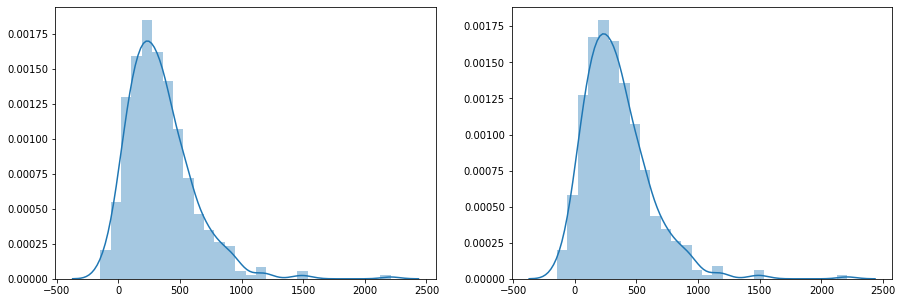

In [389]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(Y)
plt.subplot(1,2,2)
sns.distplot(Y_pred)

# pred & new

In [390]:
data_copy.corr()

,Price,Open,High,Low,Change %,Pred,new
Price,1.000000,0.989758,0.995125,0.996830,0.057801,0.138300,0.164504
Open,0.989758,1.000000,0.995988,0.993992,-0.063980,0.216978,0.058551
High,0.995125,0.995988,1.000000,0.994194,0.004574,0.193260,0.142109
Low,0.996830,0.993992,0.994194,1.000000,0.002571,0.119018,0.091895
Change %,0.057801,-0.063980,0.004574,0.002571,1.000000,-0.350135,0.781617
Pred,0.138300,0.216978,0.193260,0.119018,-0.350135,1.000000,-0.008527
new,0.164504,0.058551,0.142109,0.091895,0.781617,-0.008527,1.000000


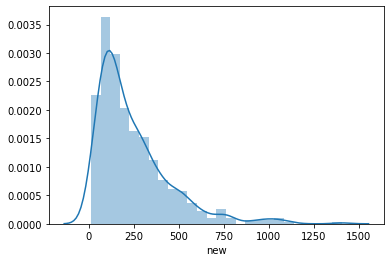

In [391]:
sns.distplot(data_copy['new'])

In [392]:
data_copy.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09,124.0,112.153318


In [393]:
data_copy.tail()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2019-04-26,31868,31851,31934,31705,9.67K,0.08,535.0,247.177322
2019-04-30,31625,31800,31824,31597,6.44K,-0.76,438.0,52.201158
2019-05-01,31563,31604,31657,31503,1.55K,-0.20,269.0,113.293305
2019-05-02,31203,31420,31425,31160,0.48K,-1.14,601.0,48.365693
2019-05-03,31341,31250,31500,31163,0.08K,0.44,280.0,429.924911


In [394]:
data_copy.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

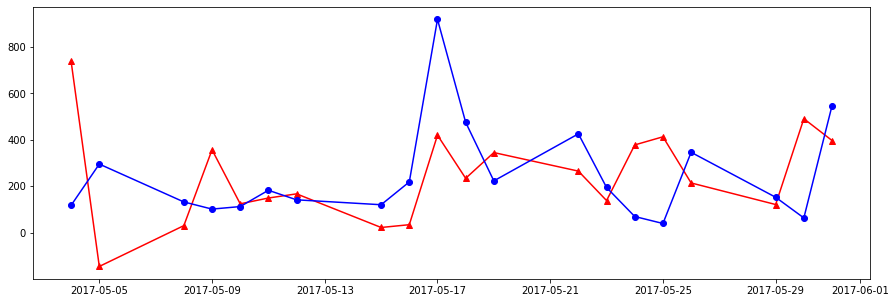

In [395]:
plt.figure(figsize=(15,5))
plt.plot(data_copy.index[:20],data_copy['Pred'][:20],color='r',marker='^')
plt.plot(data_copy.index[:20],data_copy['new'][:20],color='b',marker='o')

## Pred column is a linear combination. and New column is polynomial.

# Beta Calculation using regression

In [396]:
nifty = pd.read_csv('Nifty50.csv')

In [397]:
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [398]:
nifty["Day_perc_change"] = nifty['Close'].pct_change()*100

In [399]:
nifty['Day_perc_change'].fillna(0,inplace=True)

In [400]:
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_perc_change
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.707752
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.141922
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-1.010944
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.016438


In [401]:
data_copy.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09,124.0,112.153318


In [402]:
data_copy.shape

(512, 8)

In [403]:
nifty.shape

(494, 8)

In [404]:
nifty['Date'] = nifty['Date'].astype('datetime64')

In [405]:
nifty.set_index('Date',inplace = True)

In [406]:
nifty.shape

(494, 7)

In [407]:
data_copy.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09,124.0,112.153318


In [408]:
nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_perc_change
Date,,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.707752
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.141922
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-1.010944
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.016438


In [409]:
data_copy[7:20]

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-15,28008,28049,28157,27996,8.76K,-0.04,22.0,120.069010
2017-05-16,28109,28025,28159,28025,7.73K,0.36,34.0,218.401641
2017-05-17,28614,28170,28638,28170,15.92K,1.80,420.0,919.376358
2017-05-18,28710,28666,28980,28551,23.80K,0.34,234.0,475.389093
2017-05-19,28634,28660,28779,28531,13.16K,-0.26,345.0,222.895307
2017-05-22,28783,28590,28799,28568,9.31K,0.52,265.0,425.738484
2017-05-23,28808,28804,28930,28740,12.50K,0.09,138.0,194.449548
2017-05-24,28719,28770,28770,28650,8.69K,-0.31,378.0,69.289005
2017-05-25,28638,28769,28770,28600,9.93K,-0.28,413.0,39.225874


In [410]:
nifty.head(15)

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_perc_change
Date,,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.707752
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.141922
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-1.010944
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.016438
2017-05-22,9480.25,9498.65,9427.90,9438.25,202874757,9432.97,0.109781
2017-05-23,9445.05,9448.05,9370.00,9386.15,231345629,11553.27,-0.552009
2017-05-24,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,-0.272742
2017-05-25,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,1.593923


In [411]:
data_copy.tail()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2019-04-26,31868,31851,31934,31705,9.67K,0.08,535.0,247.177322
2019-04-30,31625,31800,31824,31597,6.44K,-0.76,438.0,52.201158
2019-05-01,31563,31604,31657,31503,1.55K,-0.20,269.0,113.293305
2019-05-02,31203,31420,31425,31160,0.48K,-1.14,601.0,48.365693
2019-05-03,31341,31250,31500,31163,0.08K,0.44,280.0,429.924911


In [412]:
nifty.tail()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_perc_change
Date,,,,,,,
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,-0.865217
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,-1.204133
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,-0.507507
2019-05-10,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,-0.202623
2019-05-13,11258.70,11300.20,11125.60,11148.20,357586433,16722.91,-1.158801


In [413]:
nifty[-15:]

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_perc_change
Date,,,,,,,
2019-04-18,11856.15,11856.15,11738.50,11752.80,339653709,18271.27,-0.291419
2019-04-22,11727.05,11727.05,11583.95,11594.45,260356055,13754.12,-1.347339
2019-04-23,11612.95,11645.95,11564.80,11575.95,272544486,14500.53,-0.159559
2019-04-24,11601.50,11740.85,11578.85,11726.15,335196513,17046.66,1.297518
2019-04-25,11735.70,11796.75,11624.30,11641.80,604360395,28254.30,-0.719332
2019-04-26,11683.75,11762.90,11661.75,11754.65,333483764,18098.83,0.969352
2019-04-30,11748.75,11756.25,11655.90,11748.15,532630874,23324.98,-0.055297
2019-05-02,11725.55,11789.30,11699.55,11724.75,380278045,17790.06,-0.199180
2019-05-03,11722.60,11770.90,11699.35,11712.25,305519934,15156.32,-0.106612


In [414]:
data_copy.tail()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2019-04-26,31868,31851,31934,31705,9.67K,0.08,535.0,247.177322
2019-04-30,31625,31800,31824,31597,6.44K,-0.76,438.0,52.201158
2019-05-01,31563,31604,31657,31503,1.55K,-0.20,269.0,113.293305
2019-05-02,31203,31420,31425,31160,0.48K,-1.14,601.0,48.365693
2019-05-03,31341,31250,31500,31163,0.08K,0.44,280.0,429.924911


In [415]:
data_stock = pd.read_csv('week2.csv')

In [416]:
data_stock.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_perc_change,Trend
0,0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01,2017,May,0.000000,Slight Change
1,1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97,2017,May,1.905802,Positive
2,2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37,2017,May,0.061116,Slight Change
3,3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44,2017,May,-1.827340,Negative
4,4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,2017,May,-0.592881,Slight Negative


In [417]:
data_stock.shape

(494, 20)

In [418]:
nifty.shape

(494, 7)

In [419]:
X = nifty['Day_perc_change'][-90:]

In [420]:
X

Date
2018-12-31    0.024402
2019-01-01    0.437743
2019-01-02   -1.077900
2019-01-03   -1.114200
2019-01-04    0.516292
                ...   
2019-05-07   -0.865217
2019-05-08   -1.204133
2019-05-09   -0.507507
2019-05-10   -0.202623
2019-05-13   -1.158801
Name: Day_perc_change, Length: 90, dtype: float64

In [421]:
Y = data_stock['Day_perc_change'][-90:]

In [422]:
Y

404   -0.533605
405    0.151363
406   -2.794645
407   -0.879215
408    0.424073
         ...   
489   -0.114015
490   -0.773650
491   -0.378939
492    0.100378
493   -1.324718
Name: Day_perc_change, Length: 90, dtype: float64

In [423]:
data_stock[-90:]

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_perc_change,Trend
404,405,MARUTI,EQ,2018-12-31,7505.55,7550.00,7572.75,7443.1,7452.00,7465.50,7516.95,547975,4.119102e+09,55374,137752,25.14,2018,December,-0.533605,Slight Negative
405,406,MARUTI,EQ,2019-01-01,7465.50,7449.75,7494.00,7395.0,7476.85,7476.80,7443.84,625360,4.655079e+09,55211,56614,9.05,2019,January,0.151363,Slight Change
406,407,MARUTI,EQ,2019-01-02,7476.80,7445.00,7460.00,7244.0,7269.00,7267.85,7338.30,891844,6.544620e+09,97563,282890,31.72,2019,January,-2.794645,Negative
407,408,MARUTI,EQ,2019-01-03,7267.85,7280.00,7350.00,7185.6,7191.00,7203.95,7271.97,715168,5.200679e+09,86856,216975,30.34,2019,January,-0.879215,Slight Negative
408,409,MARUTI,EQ,2019-01-04,7203.95,7239.00,7309.00,7161.2,7249.95,7234.50,7236.84,774445,5.604533e+09,76134,154216,19.91,2019,January,0.424073,Slight Change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,491,MARUTI,EQ,2019-05-07,6709.65,6744.90,6785.25,6680.0,6693.00,6702.00,6737.56,586684,3.952821e+09,69696,198757,33.88,2019,May,-0.114015,Slight Change
490,492,MARUTI,EQ,2019-05-08,6702.00,6679.00,6693.00,6616.0,6650.00,6650.15,6655.70,552749,3.678929e+09,59897,228920,41.41,2019,May,-0.773650,Slight Negative
491,493,MARUTI,EQ,2019-05-09,6650.15,6637.00,6678.00,6600.0,6609.85,6624.95,6646.86,570000,3.788710e+09,71334,257451,45.17,2019,May,-0.378939,Slight Change
492,494,MARUTI,EQ,2019-05-10,6624.95,6623.00,6664.90,6575.0,6630.00,6631.60,6622.41,608669,4.030855e+09,75423,247688,40.69,2019,May,0.100378,Slight Change


In [424]:
print(X.shape)
print(Y.shape)

(90,)
(90,)


In [425]:
lr = LinearRegression()

In [426]:
lr.fit(np.asarray(X).reshape(-1,1),np.asarray(Y).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [427]:
beta = lr.coef_

In [428]:
beta

array([[0.95490719]])

In [429]:
Y_pred = lr.predict(np.asarray(X).reshape(-1,1))

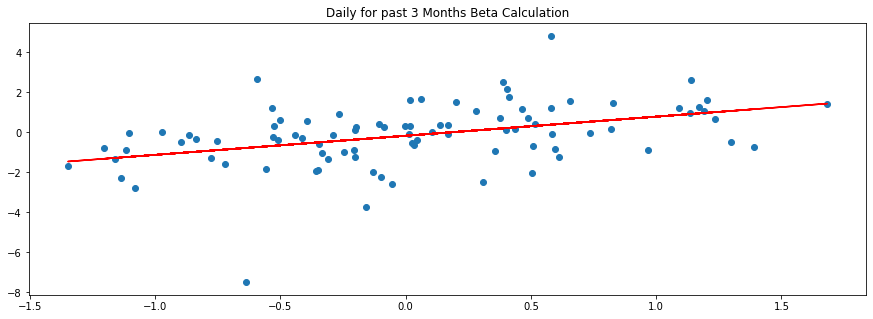

In [430]:
plt.figure(figsize=(15,5))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='r')
plt.title('Daily for past 3 Months Beta Calculation')
plt.show()

In [431]:
Y =[]
for i in range(0,494,30):
    Y.append(data_stock['Close Price'][i])
    

In [432]:
Y = np.asarray(Y)

In [433]:
Y.shape

(17,)

In [434]:
Y = pd.DataFrame(Y)

In [435]:
Y['Monthly Returns'] = Y.pct_change()*100

In [436]:
Y.fillna(0,inplace=True)

In [437]:
nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Day_perc_change
Date,,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.707752
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.141922
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-1.010944
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.016438


In [438]:
X =[]
for i in range(0,494,30):
    X.append(nifty['Close'][i])
    
    

In [439]:
X = pd.DataFrame(X)

In [440]:
X['Monthly Return'] = X.pct_change()*100

In [441]:
X.fillna(0,inplace=True)

In [442]:
print(X.shape,Y.shape)

(17, 2) (17, 2)


In [443]:
X = X['Monthly Return']
Y = Y['Monthly Returns']

In [444]:
print(X.shape,Y.shape)

(17,) (17,)


In [445]:
lr.fit(np.asarray(X).reshape(-1,1),np.asarray(Y).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [446]:
beta_monthly = lr.coef_

In [447]:
beta_monthly

array([[1.14388272]])

In [448]:
Y_pred = lr.predict(np.asarray(X).reshape(-1,1))

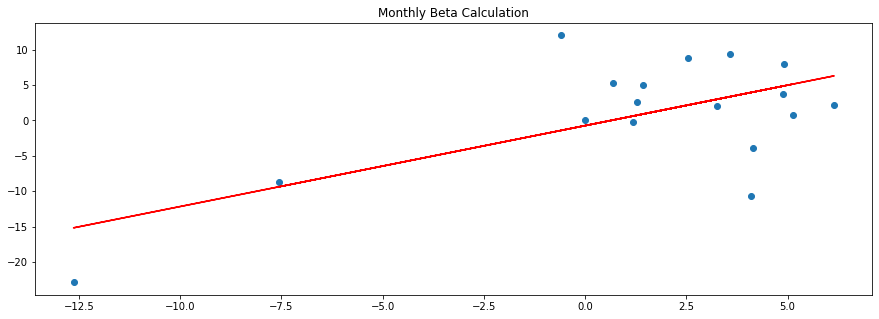

In [449]:
plt.figure(figsize=(15,5))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='r')
plt.title('Monthly Beta Calculation')
plt.show()

# Beta realtes the movement of stock with respect to its market. If the value of beta is greater than 1 means the stock is more riskier and jumps  more as compared to the market and vice-versa for less than 1. If the beta is negative, then it means the stock moves in opposite direction with the market